In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import numpy as np

from sparcscore.pipeline.project import Project
from sparcscore.pipeline.workflows import CytosolSegmentationCellpose
from sparcscore.pipeline.extraction import HDF5CellExtraction
from sparcscore.pipeline.classification import CellFeaturizer
from sparcscore.pipeline.selection import LMDSelection

In [2]:
project_location = f"project"

project = Project(os.path.abspath(project_location),
                  config_path= "config_example4.yml",
                  overwrite=True,
                  debug=True,
                  segmentation_f=CytosolSegmentationCellpose,
                  extraction_f=HDF5CellExtraction,
                  classification_f=CellFeaturizer,
                  selection_f=LMDSelection
                  )

modifying config
[22/07/2024 13:51:55] Loading config from /Users/sophia/Documents/GitHub/SPARCSspatial/example_data/example_4/project/config.yml
[22/07/2024 13:51:55] Loading classes from default classes path: /Users/sophia/Documents/GitHub/SPARCSspatial/example_data/example_4/project/segmentation/classes.csv
[22/07/2024 13:51:55] Setup output folder at /Users/sophia/Documents/GitHub/SPARCSspatial/example_data/example_4/project/extraction/data
[22/07/2024 13:51:55] current run: 0


/Users/sophia/Documents/GitHub/SPARCSspatial/src/sparcscore/pipeline/project.py:154: UserWarning: There is already a directory in the location path
  warnings.warn("There is already a directory in the location path")


In [3]:
#these example images are downloaded from the human protein atlas (www.proteinatlas.org)
images = ["./input_images/ch1.tif",
          "./input_images/ch2.tif",
          "./input_images/ch3.tif"]

project.load_input_from_tif_files(images)

[22/07/2024 13:51:55] Overwrite is set to True. Existing input image was deleted.
[22/07/2024 13:51:55] saved input_image: /Users/sophia/Documents/GitHub/SPARCSspatial/example_data/example_4/project/input_image.ome.zarr


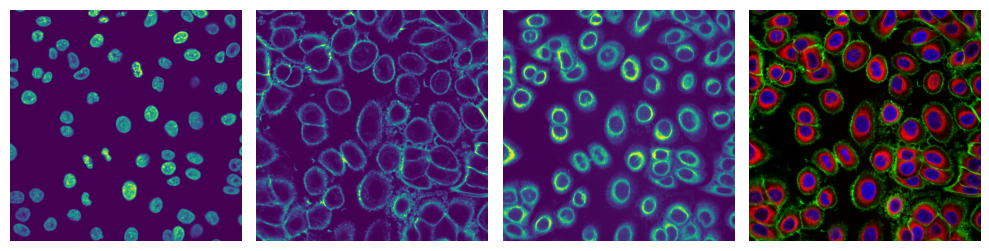

In [4]:
# visualize input images as example
# it is not recommended to execute this block with large input images as it will compute for some time

def colorize(im, color, clip_percentile=0.0):
    """
    Helper function to create an RGB image from a single-channel image using a
    specific color.
    """
    # Check that we do just have a 2D image
    if im.ndim > 2 and im.shape[2] != 1:
        raise ValueError('This function expects a single-channel image!')

    # Rescale the image according to how we want to display it
    im_scaled = im.astype(np.float32) - np.percentile(im, clip_percentile)
    im_scaled = im_scaled / np.percentile(im_scaled, 100 - clip_percentile)
    im_scaled = np.clip(im_scaled, 0, 1)

    # Need to make sure we have a channels dimension for the multiplication to work
    im_scaled = np.atleast_3d(im_scaled)

    # Reshape the color (here, we assume channels last)
    color = np.asarray(color).reshape((1, 1, -1))
    return im_scaled * color

def generate_composite(images, colors = [(0, 0, 1),(0, 1, 0), (1, 0, 0), (1, 0, 1)], plot = False):
    colorized = []
    for image, color in zip(images, colors):
        image = colorize(image, color, 0.0)
        colorized.append(image)

    if plot:
        for i in colorized:
            plt.figure()
            plt.imshow(i)

    image = colorized[0]
    for i in range(len(colorized)-1):
        image += colorized[i+1]

    return(np.clip(image, 0, 1))

fig, axs = plt.subplots(1, 4, figsize = (10, 4));
axs[0].imshow(project.input_image[0]);
axs[0].axis("off");

axs[1].imshow(project.input_image[1]);
axs[1].axis("off");

axs[2].imshow(project.input_image[2]);
axs[2].axis("off");

img = generate_composite(project.input_image)

axs[3].imshow(img)
axs[3].axis("off");

fig.tight_layout()

[22/07/2024 13:51:56] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CytosolSegmentationCellpose_vvtlcdcr for CytosolSegmentationCellpose
[22/07/2024 13:51:56] GPU Status for segmentation is True and will segment using the following device mps.
[22/07/2024 13:51:57] Segmenting nucleus using the following model: nuclei
[22/07/2024 13:52:11] Segmenting cytosol using the following model: cyto2
[22/07/2024 13:53:38] Performing filtering to match Cytosol and Nucleus IDs.
[22/07/2024 13:53:39] Removed 15 nuclei and 5 cytosols due to filtering.
[22/07/2024 13:53:39] After filtering, 41 matching nuclei and cytosol masks remain.
[22/07/2024 13:53:39] Total time to perform nucleus and cytosol mask matching filtering: 1.11 seconds
[22/07/2024 13:53:40] Filtering status for this segmentation is set to True.
[22/07/2024 13:53:40] Filtering has been performed during segmentation. Nucleus and Cytosol IDs match. No additional steps are required.
[22/07/2024 13:53

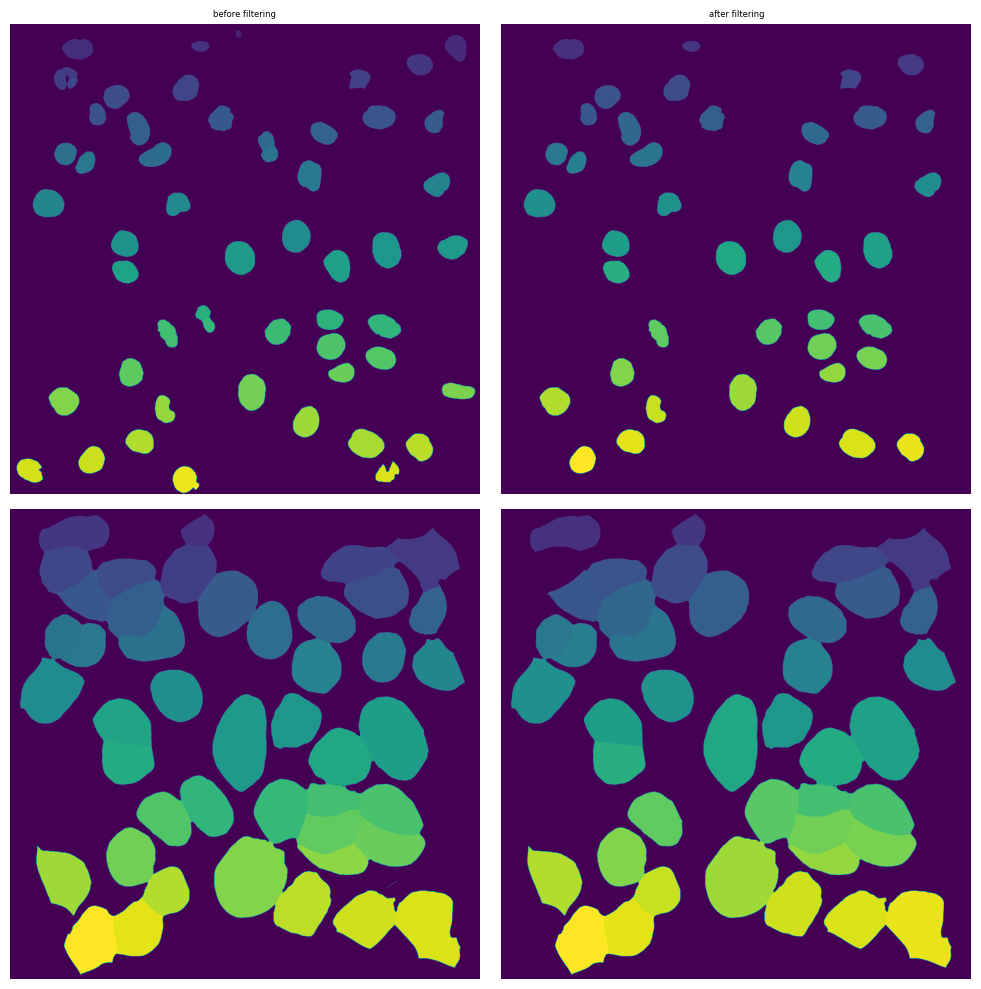

In [5]:
project.segment()

<HDF5 dataset "labels": shape (2, 2159, 2159), type "<u4">


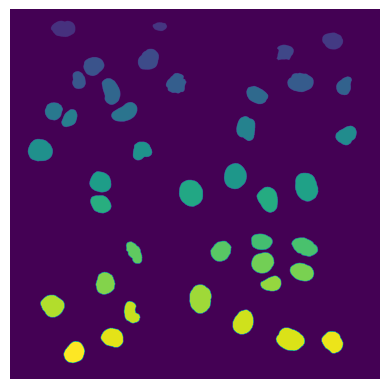

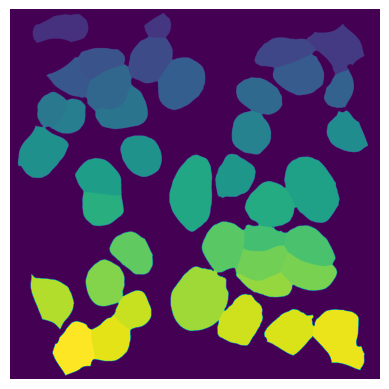

In [6]:
with h5py.File(f"{project_location}/segmentation/segmentation.h5") as hf:
    segmentation = hf.get("labels")
    print(segmentation)

    plt.figure()
    plt.imshow(segmentation[0])
    plt.axis("off")

    plt.figure()
    plt.imshow(segmentation[1])
    plt.axis("off")

In [7]:
project.extract()

[22/07/2024 13:53:40] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_kcuatu31 for HDF5CellExtraction
[22/07/2024 13:53:40] Using channel label <HDF5 dataset "channels": shape (3, 2159, 2159), type "<u2">
[22/07/2024 13:53:40] Using segmentation label <HDF5 dataset "labels": shape (2, 2159, 2159), type "<u4">
[22/07/2024 13:53:40] Created new data directory /Users/sophia/Documents/GitHub/SPARCSspatial/example_data/example_4/project/extraction/data
[22/07/2024 13:53:40] Setup output folder at /Users/sophia/Documents/GitHub/SPARCSspatial/example_data/example_4/project/extraction/data
[22/07/2024 13:53:40] Started extraction
[22/07/2024 13:53:40] Loading segmentation data from /Users/sophia/Documents/GitHub/SPARCSspatial/example_data/example_4/project/segmentation/segmentation.h5
[22/07/2024 13:53:40] Finished loading channel data (3, 2159, 2159)
[22/07/2024 13:53:40] Finished loading label data (2, 2159, 2159)
[22/07/2024 13:53:40]

Processing cell batches:   0%|          | 0/41 [00:00<?, ?it/s]

multiprocessing done.
[22/07/2024 13:53:43] Finished extraction in 0.68 seconds (60.34 cells / second)
[22/07/2024 13:53:43] Transferring results to final HDF5 data container.
[22/07/2024 13:53:43] number of cells too close to image edges to extract: 6
[22/07/2024 13:53:43] A total of 6 cells were too close to the image border to be extracted. Their cell_ids were saved to file /Users/sophia/Documents/GitHub/SPARCSspatial/example_data/example_4/project/segmentation/removed_classes_too_close_to_edges.csv.
[22/07/2024 13:53:43] Transferring extracted single cells to .hdf5
[22/07/2024 13:53:43] index created.
[22/07/2024 13:53:43] Finished cleaning up cache.
[22/07/2024 13:53:43] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_kcuatu31'>


(35, 5, 400, 400)


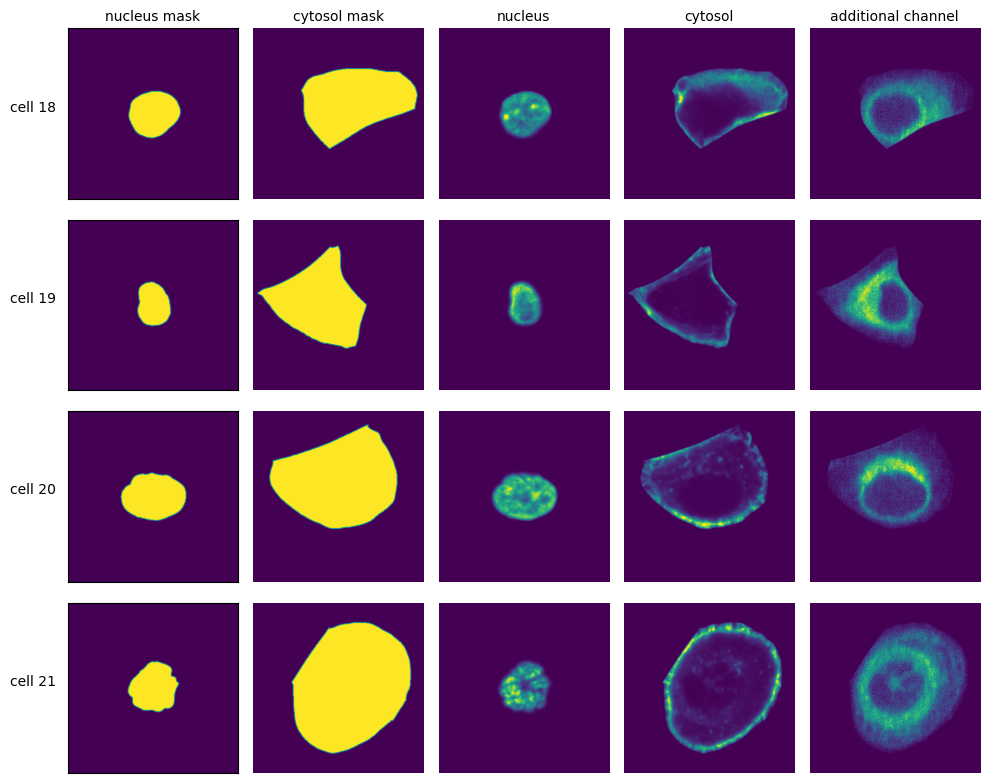

In [8]:
with h5py.File(f"{project_location}/extraction/data/single_cells.h5") as hf:
    index = hf.get("single_cell_index")
    images = hf.get("single_cell_data")

    print(images.shape)

    n_cells = [2, 3, 4, 5]
    fig, axs = plt.subplots(len(n_cells), 5, figsize = (5*2, len(n_cells)*2))
    labels = ["nucleus mask", "cytosol mask", "nucleus", "cytosol", "additional channel"]
    
    for i, id in enumerate(n_cells):
        cell_id = index[id][1]
        image = images[id]

        for n, _img in enumerate(image):
            axs[i, n].imshow(_img, vmin = 0, vmax = 1)

            if n == 0:
                axs[i, n].set_ylabel(f"cell {cell_id}", fontsize = 10, rotation = 0, labelpad = 25)
                axs[i, n].xaxis.set_visible(False)
                axs[i, n].tick_params(left=False, labelleft=False)
            else:
                axs[i, n].axis("off")
        
            if i == 0:
                axs[i, n].set_title(labels[n], fontsize = 10)
            
            
    fig.tight_layout()

In [9]:
project.classify(accessory = [(), (), ()])

[22/07/2024 13:53:43] Started classification
[22/07/2024 13:53:43] starting with run 0
[22/07/2024 13:53:43] channel_classification: 4
[22/07/2024 13:53:43] batch_size: 900
[22/07/2024 13:53:43] dataloader_worker_number: 0
[22/07/2024 13:53:43] inference_device: cpu
[22/07/2024 13:53:43] screen_label: Ch4_Featurization
[22/07/2024 13:53:43] 0 different accessory datasets specified
[22/07/2024 13:53:43] loading /Users/sophia/Documents/GitHub/SPARCSspatial/example_data/example_4/project/extraction/data
[22/07/2024 13:53:43] Adding hdf5 file /Users/sophia/Documents/GitHub/SPARCSspatial/example_data/example_4/project/extraction/data/single_cells.h5 to index...
Total: 35
0: 35

[22/07/2024 13:53:43] start processing 1 batches
[22/07/2024 13:53:44] finished processing


/Users/sophia/mambaforge/envs/SPARCSspatial-dev/lib/python3.10/site-packages/torch/masked/maskedtensor/core.py:156: UserWarning: The PyTorch API of MaskedTensors is in prototype stage and will change in the near future. Please open a Github issue for features requests and see our documentation on the torch.masked module for further information about the project.
  warnings.warn(("The PyTorch API of MaskedTensors is in prototype stage "


In [10]:
#load classification results
results = pd.read_csv(f"{project_location}/classification/0_Ch3_Featurization/calculated_features.csv", index_col = 0)
results

,nucleus_area,cytosol_area,mean,median,quant75,quant25,summed_intensity_nucleus_area,summed_intensity_cytosol_area,summed_intensity_nucleus_area_normalized,summed_intensity_cytosol_area_normalized,label,cell_id
0,17439.0,47697.0,0.078683,0.000000,0.053558,0.0,5993.9067,12589.2290,0.343707,0.263942,0,37
1,10037.0,38690.0,0.060698,0.000000,0.000000,0.0,3270.5220,9711.7290,0.325847,0.251014,0,64
2,10895.0,33189.0,0.068972,0.000000,0.000000,0.0,4154.8213,11035.5850,0.381351,0.332507,0,49
3,13898.0,48755.0,0.061955,0.000000,0.044647,0.0,3687.5723,9912.8430,0.265331,0.203319,0,31
4,19686.0,91857.0,0.130206,0.028305,0.169800,0.0,4993.3710,20832.9510,0.253651,0.226798,0,40
5,19152.0,85260.0,0.133850,0.009804,0.196045,0.0,5171.1790,21416.0040,0.270007,0.251185,0,42
6,9806.0,29429.0,0.054365,0.000000,0.000000,0.0,3290.8267,8698.4660,0.335593,0.295575,0,28
7,8471.0,47575.0,0.070014,0.000000,0.061859,0.0,1731.4529,11202.3000,0.204398,0.235466,0,15
8,8606.0,30018.0,0.050797,0.000000,0.000000,0.0,2604.3480,8127.5996,0.302620,0.270758,0,22
9,14523.0,47223.0,0.077387,0.000000,0.089294,0.0,3846.5500,12381.9320,0.264859,0.262201,0,55


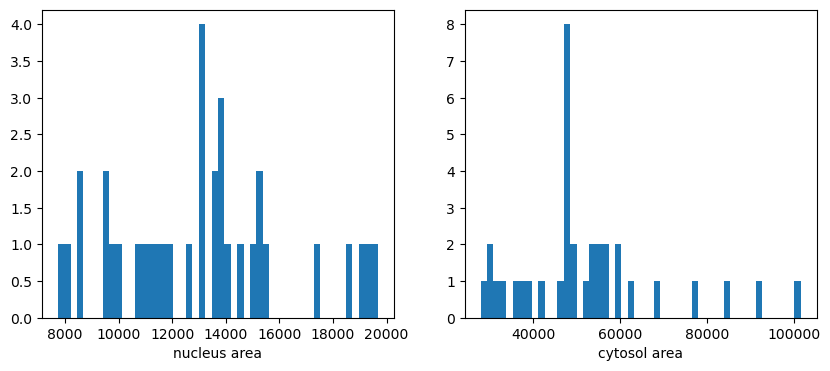

In [11]:
fig, axs = plt.subplots(1, 2, figsize = (10, 4))
axs[0].hist(results["nucleus_area"], bins = 50)
axs[0].set_xlabel("nucleus area");

axs[1].hist(results["cytosol_area"], bins = 50)
axs[1].set_xlabel("cytosol area");